##OUTLIERS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define a dataset
dataset = [11,10,12,14,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

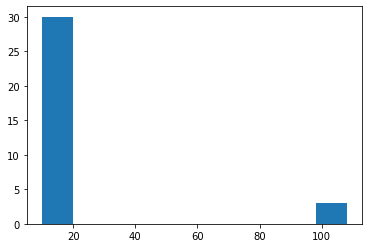

In [3]:
plt.hist(dataset)

In [4]:
outliers = []
mean=np.mean(dataset)
std=np.std(dataset)
threshold = 3

In [5]:
print(mean,std)

21.454545454545453 26.719747446060698


In [6]:
for i in dataset:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
        outliers.append(i)
print(outliers)

[102, 107, 108]


##INTER QUARTILE RANGE(IQR)

In [7]:
#1.sort the data
dataset=sorted(dataset)

In [8]:
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [9]:
#2.calculate Q1 and Q3

Q1,Q3=np.percentile(dataset,[25,75])

In [10]:
#3.IQR(Q3-Q1)
IQR=(Q3-Q1)
print(IQR)

3.0


In [11]:
#4.find the lower fence(Q1-1.5(IQR))

lower_fence=Q1-(1.5*IQR)

In [12]:
#5.find the upper fence(Q3+1.5(IQR))

upper_fence=Q3+(1.5*(IQR))

In [13]:
print(lower_fence,upper_fence)

7.5 19.5


In [14]:
#finding outliers with lower_fence and upper_fence
outliers1=[]
for i in dataset:
    if i>upper_fence:
        outliers1.append(i)
        if i<lower_fence:
            outliers1.append(i)
        
print(outliers1)

[102, 107, 108]


In [15]:
#6.new data without outliers
new_data=[]
for i in dataset:
    if i<upper_fence:
        new_data.append(i)
        if i>lower_fence:
            new_data.append(i)
print(new_data)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 19, 19]


In [16]:
import seaborn as sns

C:\Users\Shivanand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

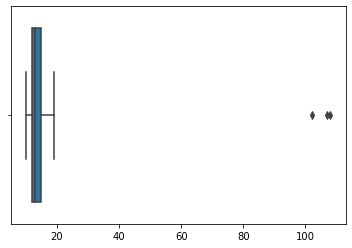

In [17]:
sns.boxplot(dataset)